In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [95]:
df=pd.read_csv(r"C:/Users/sneha/Downloads/ml-project-car-price-predication-system/ml-project-car-price-predication-system/car_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [97]:
df.shape
# Dispaly information about dataset
df.info()
# Infomrmation about missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [101]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())
# Replace Character values
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64
Seller_Type
0    195
1    106
Name: count, dtype: int64
Transmission
0    261
1     40
Name: count, dtype: int64


In [125]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [129]:
# Find Depended and Independed variables
x=df.drop(['Car_Name','Selling_Price'],axis='columns')  # Independed variables 
y=df['Selling_Price']  # Depended variables
x
y

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [117]:
len(x_train)

270

In [119]:
len(x_test)

31

In [123]:
# Model Prepration
model=LinearRegression()
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_train

204    2.75
249    5.25
277    9.70
194    0.20
244    5.95
       ... 
75     3.95
22     4.40
72     7.45
15     7.75
168    0.42
Name: Selling_Price, Length: 270, dtype: float64

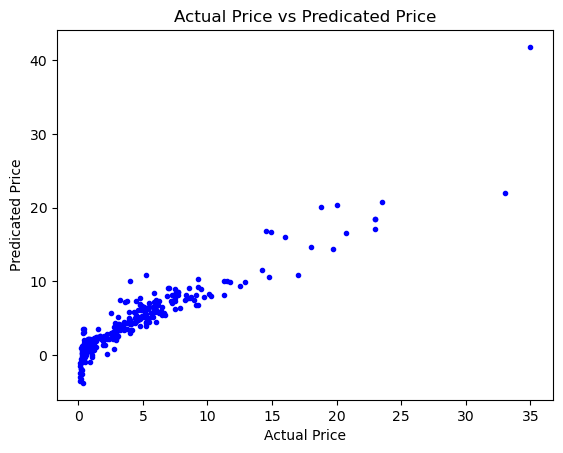

In [121]:
plt.scatter(y_train,y_pred_train,marker='.',color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicated Price")
plt.title("Actual Price vs Predicated Price")
plt.show()

In [111]:
error_score=metrics.r2_score(y_train,y_pred_train)
print("R squared Error for training data set ", error_score)
# Predication an testing data
y_pred_test=model.predict(x_test)

R squared Error for training data set  0.8799451660493716


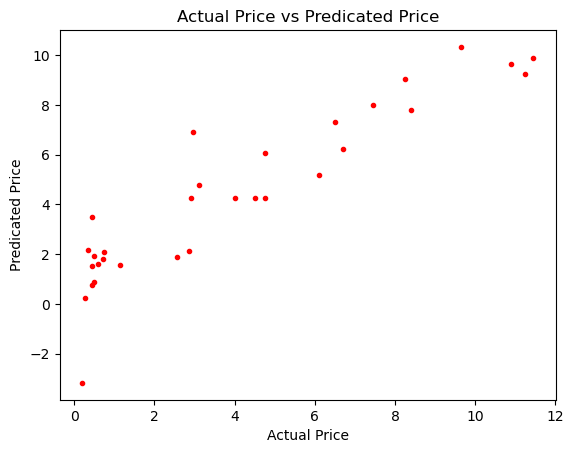

In [113]:
plt.scatter(y_test,y_pred_test,marker='.',color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicated Price")
plt.title("Actual Price vs Predicated Price")
plt.show()

In [131]:
error_score=metrics.r2_score(y_test,y_pred_test)
print("R squared Error for training data set ", error_score)
model.score(x_test,y_test)

R squared Error for training data set  0.836576671502587


0.836576671502587